In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt


In [5]:
x_train = pd.read_csv("C:/Users/hshaik/Desktop/Datathon Data Set/hackathon-packet/data/X_train.csv", index_col=[1])
y_train = pd.read_csv("C:/Users/hshaik/Desktop/Datathon Data Set/hackathon-packet/data/y_train.csv", index_col=[1])
x_test = pd.read_csv("C:/Users/hshaik/Desktop/Datathon Data Set/hackathon-packet/data/X_test.csv", index_col=[1])

x_train = x_train.drop(columns=['DC_ZIPCODE'])

x_train = x_train.drop(['Invoice_Year','SPEED_RATING_CODE', 'WIDTH','Invoice_Month','Invoice_Week','RIM_DIAMETER_SIZE_CODE',
                      'HEIGHT','AVG_UNIT_WEIGHT','Monthly_Top_1_Customer_Zip','Monthly_Top_2_Customer_Zip','Monthly_Top_3_Customer_Zip','Monthly_Top_4_Customer_Zip','Monthly_Top_5_Customer_Zip','Monthly_Top_6_Customer_Zip','Monthly_Top_7_Customer_Zip','Monthly_Top_8_Customer_Zip','Monthly_Top_9_Customer_Zip','Monthly_Top_10_Customer_Zip','Monthly_Top_1_Customer_Total_Sales','Monthly_Top_2_Customer_Total_Sales','Monthly_Top_3_Customer_Total_Sales','Monthly_Top_4_Customer_Total_Sales','Monthly_Top_5_Customer_Total_Sales','Monthly_Top_6_Customer_Total_Sales','Monthly_Top_7_Customer_Total_Sales','Monthly_Top_8_Customer_Total_Sales','Monthly_Top_9_Customer_Total_Sales','Monthly_Top_10_Customer_Total_Sales'],axis=1)


x_train = pd.get_dummies(x_train)

x_test = x_test.drop(columns=['DC_ZIPCODE'])

x_test = x_test.drop(['Invoice_Year','SPEED_RATING_CODE', 'WIDTH','Invoice_Month','Invoice_Week','RIM_DIAMETER_SIZE_CODE',
                      'HEIGHT','AVG_UNIT_WEIGHT','Monthly_Top_1_Customer_Zip','Monthly_Top_2_Customer_Zip','Monthly_Top_3_Customer_Zip','Monthly_Top_4_Customer_Zip','Monthly_Top_5_Customer_Zip','Monthly_Top_6_Customer_Zip','Monthly_Top_7_Customer_Zip','Monthly_Top_8_Customer_Zip','Monthly_Top_9_Customer_Zip','Monthly_Top_10_Customer_Zip','Monthly_Top_1_Customer_Total_Sales','Monthly_Top_2_Customer_Total_Sales','Monthly_Top_3_Customer_Total_Sales','Monthly_Top_4_Customer_Total_Sales','Monthly_Top_5_Customer_Total_Sales','Monthly_Top_6_Customer_Total_Sales','Monthly_Top_7_Customer_Total_Sales','Monthly_Top_8_Customer_Total_Sales','Monthly_Top_9_Customer_Total_Sales','Monthly_Top_10_Customer_Total_Sales'],axis=1)

x_test = pd.get_dummies(x_test)



C:\Users\hshaik\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [25]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


#Random Forest Regression
reg = RandomForestRegressor(n_estimators=5, random_state=0)  


#Pre-Processing
trainX = x_train.replace([np.inf, -np.inf], 150)
trainY = y_train.replace([np.inf, -np.inf], 150)
trainY = trainY.replace(np.nan, 0)
trainX = trainX.replace(np.nan, 0)



'remaining_collumns=trainX2.getnnz(1)>0\ntrainX2=trainX2[remaining_collumns,:]\n\nremaining_collumns=trainY2.getnnz(1)>0\ntrainX2=trainY2[remaining_collumns,:]\n'

In [26]:

collist = trainX.columns.tolist()
collistY = trainY.columns.tolist()



         SELLING_PRICE  CATEGORY_AT Mud Utility  CATEGORY_HT SUV CUV  \
idx                                                                    
0            35.000000                        0                    0   
1            31.500000                        0                    0   
2            31.500000                        0                    0   
3            50.000000                        0                    0   
4            31.500000                        0                    0   
5            43.000000                        0                    0   
6            42.500000                        0                    0   
7            45.000000                        0                    0   
8            43.500000                        0                    0   
9            41.000000                        0                    0   
10           44.500000                        0                    0   
11           55.750000                        0                 

In [28]:
reg.fit(trainX[collist[1:-1]], trainY[collistY[1:2]])

D:\Program Files (86)\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
testX = x_test.select_dtypes(['number'])
print(testX)
testX = testX.replace([np.inf, -np.inf], 150)
testX = testX.replace(np.nan, 0)
y_pred = reg.predict(testX[collist[1:-1]])

        Unnamed: 0  SELLING_PRICE  CATEGORY_AT Mud Utility  \
idx                                                          
0                0      31.500000                        0   
1                1      41.000000                        0   
2                2      43.000000                        0   
3                3      45.000000                        0   
4                4      53.266667                        0   
5                5      53.250000                        0   
6                6      77.666667                        0   
7                7      77.500000                        0   
8                8      77.000000                        0   
9                9      81.500000                        0   
10              10      79.875000                        0   
11              11      78.625000                        0   
12              12      85.500000                        0   
13              13      84.500000                        0   
14      

[(array([[0.000000e+00, 3.500000e+01, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.150000e+01, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.000000e+00, 3.150000e+01, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       ...,
       [2.019033e+06, 1.770000e+02, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.019034e+06, 1.670000e+02, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.019035e+06, 2.260000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]]), 0.9), (array([[0.000000e+00, 3.500000e+01, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.150000e+01, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.000000e+00, 3.150000e+01, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       ...,
       [2.0

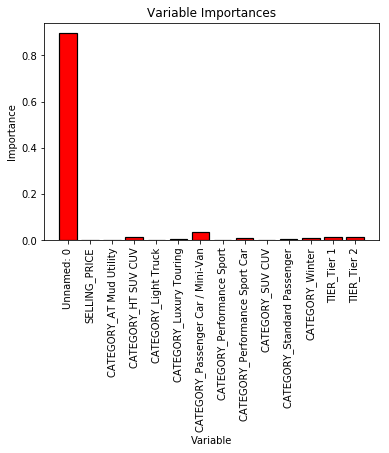

In [43]:
importances = list(reg.feature_importances_)
features = trainX
feature_list = list(features.columns)
features = np.array(features)


feature_importances = [(features, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print(feature_importances[0:5])
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

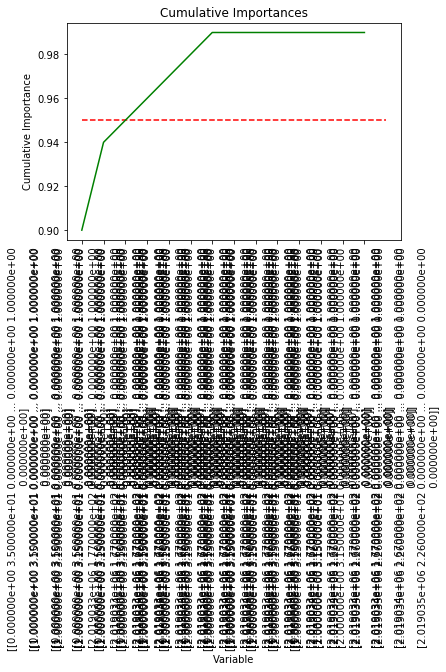

In [31]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [32]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 3


In [34]:
def submit_score(predictions, team_key):
    """
    Submit your predictions for scoring

    Args:
        predictions (DataFrame): Pandas DataFrame containing the following required
            column:
                1. idx (int) - The unique identifier for each observation
                2. predictions (float) - Your predicted value
        team_key (str): Your team's unique identifier

    Returns:
        Response: Flask Response object. See the Response.text field to get the score
            from your latest submission. Your best score will be reflected on the
            leaderboard
    """

    import requests
    import json
    import numpy
    def default(o):
        if isinstance(o, numpy.int64):
            return int(o)
        raise TypeError

    API_ENDPOINT = "http://coe-hackathon-dot-atd-fn-anacoe-dev.appspot.com/submitscore"
    payload = {
        "team_key": team_key,
        "data": predictions.loc[:, ["idx", "predictions"]].to_dict(orient="records")
    }
    resp = requests.post(
        API_ENDPOINT,
        data=json.dumps(payload, default=default),
        headers={'Content-Type': 'application/json'}
    )
    
    if resp.status_code == 404:
        #print resp.json()['error']
        print("404 error")
        return None
    
    elif resp.status_code != 200:
        raise ValueError('There was an error processing your request: '
                         '\n{}'.format(resp.text))
        return None
    else:
        score = resp.json()['score']
        print('Submission successful! Your score was \n{}'.format(score))
        return score

In [68]:
teamkey = '$pbkdf2-sha512$25000$PoewtjbmPCckBODc.///Xw$JaM4ZG7quARzuTLHQ8r73OIhku/V9NwOZr7NKlJINK49uUMq1.DDcui08oUUqnqbT9HrH.4aHwWPvXyuS05TRw'
print(y_pred)

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [95]:
#print(y_pred)

#y_pred[:,0] = y_pred[:,0].astype(int)
#y_pred = pd.DataFrame(y_pred)

#print(type(y_pred[0,0]))
#submission = pd.DataFrame(y_pred)
indx_array = [list(range(456460 ))]
myarray = np.asarray(indx_array).transpose()

#print(myarray.shape)
#print(y_pred.shape)
y_pred1 = np.hstack((myarray,y_pred))

#print(y_pred1)
submission = pd.DataFrame(y_pred1)

submission.columns = ['idx', 'predictions']
print(submission)

             idx  predictions
0            0.0     5.245951
1            1.0     3.847827
2            2.0     3.619826
3            3.0     4.468619
4            4.0    36.000000
5            5.0     9.527304
6            6.0     9.589689
7            7.0     4.770923
8            8.0     3.590433
9            9.0     4.930405
10          10.0    13.165714
11          11.0     9.250159
12          12.0     4.968431
13          13.0     6.329694
14          14.0     4.387134
15          15.0     5.298854
16          16.0     6.885746
17          17.0     4.071182
18          18.0     8.020114
19          19.0     8.020114
20          20.0     7.386654
21          21.0     8.020114
22          22.0     6.061788
23          23.0     3.951398
24          24.0     4.173441
25          25.0     4.923649
26          26.0     6.038575
27          27.0     4.399049
28          28.0     6.924478
29          29.0     4.427572
...          ...          ...
456430  456430.0     4.820474
456431  45

In [96]:
submit_score(submission, teamkey)

Submission successful! Your score was 
6.2073966662035165


'6.2073966662035165'

In [ ]:
submission.describe()